## Part1 : Process Mining

<div dir = "rtl">
هدف در این بخش بررسی فرآیند مربوط به درمان بیماران و تحلیل آن ها است.
</div>

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

<div dir = "rtl">
در بخش دوم این تمرین می خواهیم تحلیل کوهورت و نرخ بازگشت مشتریان را بدست آوریم.
</div>

In [2]:
df = pd.read_csv('PatientTreatment.csv')
df.columns = ['patient', 'action', 'resource', 'datetime']
df['datetime'] = pd.to_datetime(df['datetime'])
df.head(5)

,patient,action,resource,datetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


### 1 : Data Analysis

#### الف : Number of unique patients

In [152]:
print("Number of Unique patients:" , df['patient'].nunique())

Number of Unique patients: 100


<div dir = "rtl">
تعداد بیماران یکتا برابر ۱۰۰ می باشد.
</div>

#### ب : count number of each action

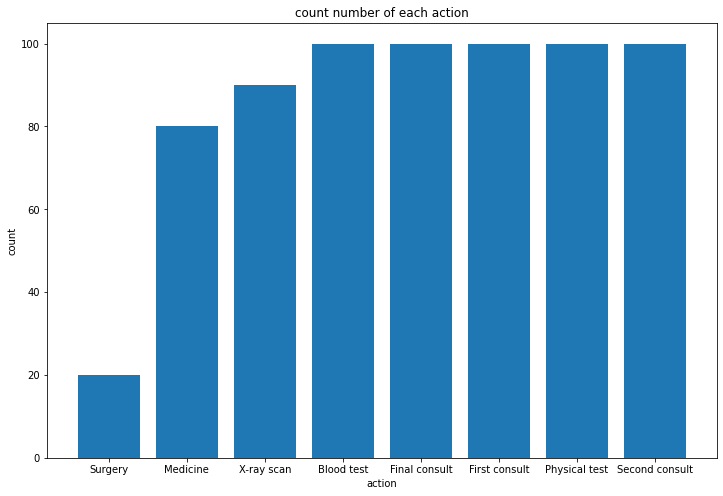

In [5]:
action_count = df.groupby('action')['action'].count().sort_values()
action_count = action_count.reset_index(name = 'count')
action_count

width = 0.3
fig, ax = plt.subplots(1,1,figsize = [12,8])
rects = ax.bar(action_count['action'] , action_count['count'])
ax.set_ylabel('count')
ax.set_xlabel('action')
ax.set_title('count number of each action')
plt.show()

<div dir = "rtl">
همانطور که معلوم است:

کمترین رخداد : surgery

بیشترین رخداد: blood test و final consult و physical test و second consult
</div>

#### ج : count number of each resource

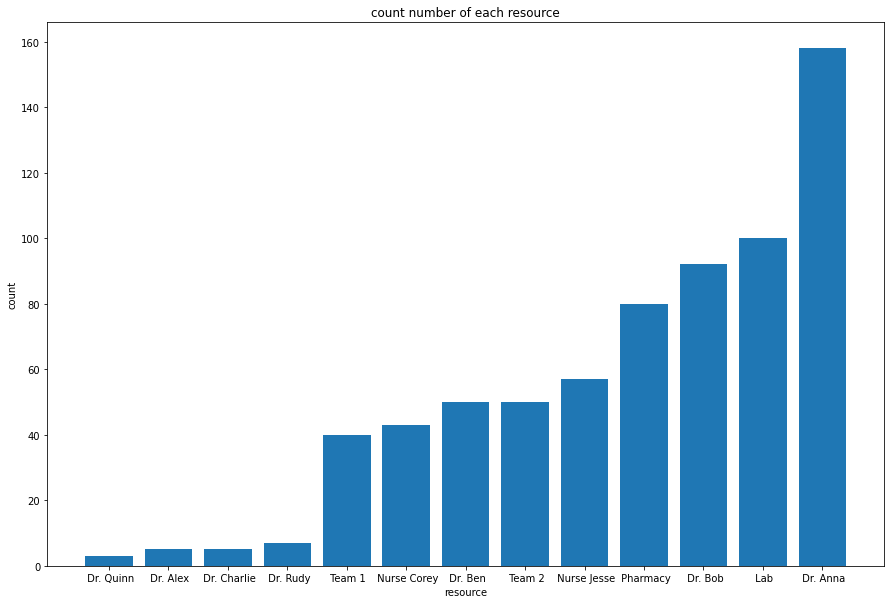

In [4]:
resource_count = df.groupby('resource')['resource'].count().sort_values()
resource_count = resource_count.reset_index(name = 'count')
df['action'] = df['action'].apply(lambda x: x.strip()) 


width = 0.35
fig, ax = plt.subplots(1,1,figsize = [15,10])
rects = ax.bar(resource_count['resource'] , resource_count['count'])
ax.set_ylabel('count')
ax.set_xlabel('resource')
ax.set_title('count number of each resource')
plt.show()



<div dir = "rtl">
همانطور که در شکل بالا معلوم است بیشترین رخداد برای Dr. Anna و کمترین رخداد برای 
Dr. Quinn می باشد.
</div>

### 2 : 


<div dir = "rtl">
 در این قسمت می خواهیم ببینیم هر رخداد توسط چه ریسورسی و با چه عملی و در چه زمنی انجام شده است؟
</div>

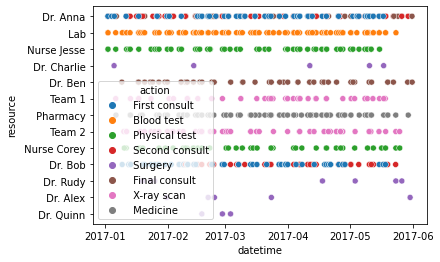

In [3]:
ax = sns.scatterplot(x=df['datetime'], y=df['resource'], hue=df['action'])


<div dir = "rtl">

همانطور که در شکل بالا مشخص است، Dr. Quinn و Dr. Alex و Dr. Rudy و Dr Charlie فقط  عمل  surgery را انجام می دهند و این عمل چون کمترین میزان رخداد را دارد این چهار دکتر همواره کمترین تعداد رخداد را دارند.


همچنین از بررسی Dr Anna و  Dr. Bob متوجه می شویم که این دو بیشترین میزان رخداد را دارند اما این رخداد ها فقط شامل first consult و  second Consult است. همچنین از بررسی دقیق نمودار می فهمیم در زمان هایی که Dr. Ben نباشد از آنجایی که Final consult باید حتما انجام شود این وظیفه بر عهده Dr Anna می باشد.

همچنین از بررسی Team 1 و Team 2 متوجه می شویم که این دو فقط x-ray scan انجام می دهند.

از بررسی Nurse Jesse و Nurse Corey متوجه می شویم که این دو فقط physical test را انجام می دهند.

از بررسی lab متوجه می شویم که فقط عمل blood test را انجام می دهد.

از بررسی pharmacy متوجه می شویم که فقط عمل  medicine را انجام می دهد.

از بررسی  Dr. Ben متوجه می شویم که فقط عمل Final consult  را انجام می دهد
</div>

### 3:

<AxesSubplot:xlabel='action', ylabel='patient'>

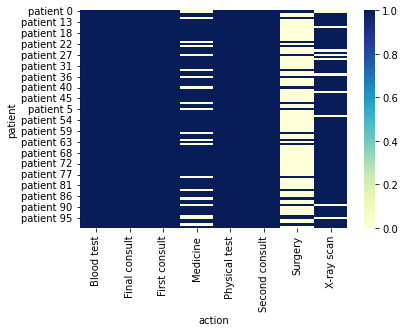

In [6]:
sns.heatmap(pd.crosstab(df['patient'], df['action']), cmap="YlGnBu")


<div dir = "rtl">
از بررسی نمودار بالا متوجه می شویم که کدام رخداد ها همیشه تکرار می شوند و کدام رخداد ها کمتر تکرار می شوند؟

همانطور که از شکل بالا معلوم است عمل های first consult، second consult، Final consult، physical test و Blood test باید همیشه انجام گیرند.

و پس از آن ها بیشترین رخداد را x-ray scan دارد و بعد از آن medicine  می باشد.
و کمترین تعداد رخداد برای Surgery است.
</div>

### 4 : 

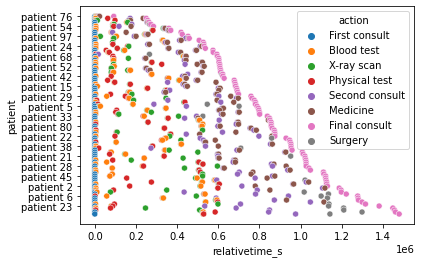

In [11]:
df2 = df.pivot_table(index='patient', aggfunc={'datetime': ['min', 'max']}).reset_index()
df2.columns = ['patient', 'caseend', 'casestart']
df = df.merge(df2, on='patient')
df['relativetime'] = df['datetime'] - df['casestart']
df['action'] = df['action'].apply(lambda x: x.strip()) 
df['caselength'] = df['caseend'] - df['casestart']
df['relativetime_s'] = df['relativetime'].dt.seconds + 86400*df['relativetime'].dt.days 

ordered = df.sort_values(by=['caselength', 'patient', 'relativetime_s'],ascending=True) 
patientnums = [int(e) for e in df['patient'].apply(lambda x: x.strip('patient'))]
ax = sns.scatterplot(x=ordered['relativetime_s'], y=ordered['patient'], hue=ordered['action'])
plt.yticks(np.arange(min(patientnums), max(patientnums)+1, 5)[::-1])
plt.show()

<div dir = "rtl">
در این نمودار می خواهیم ببینیم هر action برای هر بیمار چند ثانیه طول می کشد.
پس محور y  را بر اساس patient ها می سازیم. و محور x زمان طول کشید هر اکشن بر اسا ثانیه می باشد.

در نمودار بالا می بینیم که لایه اول عمودی بر اساس زمان، First Consult و کمی بعد از آن Blood test می باشد. در ادامه عمل ها در هم تنیده هستند اما می توان فهمید که x-ray scan و physica test می باشد. همچنین بعد از این تقریبا second consult شروع می شود.

در مرحله قبل از آخر میبینیم که بیشتر عمل های surgery انجام می شود و لایه آخر عمل ها به Final Consult اختصاص پیدا می کند.


</div>

### 5 :
<div dir = "rtl">
هدف این سوال بررسی ترتیب انجام عمل ها و تعداد بیماران هر کدام است
</div>

<div dir = "rtl">
در مرحله اول می بینیم چه تعداد از ۱۰۰ نفری که first consult را دریافت کردند، شامل چه اعمالی می شنوند.
 همانطور که از محاسبات زیر بدست می آید، از کل افرادی که first consult  داشته اند، همه آن ها شامل blood test و physical test شده اند و فقط ۹۰ نفر از آن ها شامل X-ray scan شده است. 
</div>

In [266]:
df2 = df.loc[df['patient'].isin(df[df["action"].str.contains("First consult")]['patient'])]
Number_of_bloodTest = df2[df2["action"].str.contains("Blood test")]['patient'].count()
Number_of_PhysicalTest = df2[df2["action"].str.contains("Physical test")]['patient'].count()
Number_of_XrayScan = df2[df2["action"].str.contains("X-ray scan")]['patient'].count()
Number_of_XrayScan
print("Layer 0 :")
print("Weight of First Consult :",df2['patient'].nunique() ,"\n\n")
print("Layer 1 :")
print("Weight of First Blood test : ",Number_of_bloodTest)
print("Weight of First Physical test: ",Number_of_PhysicalTest)
print("Weight of First Xray scan : ",Number_of_XrayScan)


Layer 0 :
Weight of First Consult : 100 


Layer 1 :
Weight of First Blood test :  100
Weight of First Physical test:  100
Weight of First Xray scan :  90


In [279]:
df2 = df.loc[df['patient'].isin(df[df["action"].str.contains("Second consult")]['patient'])]
Number_of_medicine = df2[df2["action"].str.contains("Medicine")]['patient'].count()
Number_of_surgery = df2[df2["action"].str.contains("Surgery")]['patient'].count()

print("Layer 2 :")
print("Weight of Second Consult :",df2['patient'].nunique() ,"\n\n")
print("Layer 3 :")
print("Weight of Surgery : ",Number_of_surgery)
print("Weight of medicine: ",Number_of_medicine)

print("\n\nLayer 4 :")
print("Weight of Final Consult :",df2['patient'].nunique() )

Layer 2 :
Weight of Second Consult : 100 


Layer 3 :
Weight of Surgery :  20
Weight of medicine:  80


Layer 4 :
Weight of Final Consult : 100


<div dir = "rtl">
حال کل افراد مرحله قبل وارد مرحله second consult می شنوند که تک لایه است و کل افراد را شامل می شود. 

در لایه بعدی به دو گروه surgery و medicine تقسیم می شویم که ۲۰ نفر را به عمل surgery و ۸۰ نفر عمل medicine برایشان انجام می شود.

در لایه آخر نیز همانطور که می دانیم، شامل کل افراد می شود.
</div>

### 6 :

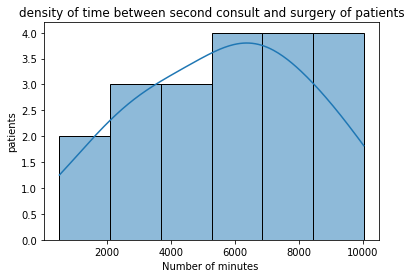

In [18]:

selected_df = df.loc[df['patient'].isin(df[df["action"].str.contains("Surgery")]['patient'])]

second_consult_date = selected_df[selected_df["action"].str.contains("Second consult")]['datetime'].values
surgery_date = selected_df[selected_df["action"].str.contains("Surgery")]['datetime'].values
total_time = surgery_date - second_consult_date
surgery_time = total_time/(np.timedelta64(1, 's')*60 )

p = sns.histplot(surgery_time,kde=True, )
plt.xlabel('Number of minutes ')
plt.ylabel('patients')
plt.title('density of time between second consult and surgery of patients')
plt.show()

<div dir = "rtl">
همانطور که در نمودار بالا می توان دید، ماکزیمم توزیع فاصله زمانی بین second consult و surgery تقریبا برابر ۶۸۰۰ دقیقه می باشد.
که برابر با ۴.۷ روز می باشد یعنی به صورت میانگین تقریبا بین ۴ تا ۵ رو طول می کشد.</div>

## Part 2 : Business analystic

<div dir = "rtl">
هدف از این بخش تحلیل کوهورت و نرخ بازگشت مشتریان برای فروش محصولات یک فروشگاه است.

</div>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

%matplotlib inline

#### 1 : Calculating retention rate

<div dir = "rtl">
الف:
در این قسمت می خواهیم ببینیم چند درصد از مشتریان، پس از گذشت یک ماه دوباره خرید خود را انجام می دهند؟
</div>

In [87]:
df_transaction = pd.read_csv('transaction.csv')
df_transaction['transaction_date'] = pd.to_datetime(df_transaction['transaction_date'])
df_transaction['transaction_month'] = df_transaction['transaction_date'].dt.month

unique_user= df_transaction[['transaction_month','customer_id']].groupby(by= ['transaction_month','customer_id']).count().reset_index()
months= unique_user.transaction_month.unique()

ret_date= (df_transaction.transaction_month ).unique()


df_transaction['cohort']= df_transaction.transaction_date.dt.strftime("%Y")+ df_transaction.transaction_date.dt.strftime("%m")
cohorts = df_transaction.groupby('customer_id')['cohort'].min().reset_index()
cohorts.columns = ['customer_id', 'first_cohort']
df_transaction = df_transaction.merge(cohorts, on='customer_id', how='left')
df_transaction = df_transaction.fillna(0)

headers = df_transaction['cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

df_transaction['cohort_distance'] = df_transaction.apply(lambda row: 
                                     (headers.index(row['cohort']) - headers.index(row['first_cohort'])) 
                                     if (row['first_cohort'] != 0 and row['cohort'] != 0)else np.nan, axis=1)
df_transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size,transaction_month,cohort,first_cohort,cohort_distance
0,1,2,2950,2017-02-25,0.0,medium,2,201702,201702,0
1,2,3,3120,2017-05-21,1.0,large,5,201705,201701,4
2,3,37,402,2017-10-16,0.0,medium,10,201710,201701,9
3,4,88,3135,2017-08-31,0.0,medium,8,201708,201702,6
4,5,78,787,2017-10-01,1.0,large,10,201710,201701,9
...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,medium,6,201706,201701,5
19996,19997,41,127,2017-11-09,1.0,medium,11,201711,201701,10
19997,19998,87,2284,2017-04-14,1.0,medium,4,201704,201704,0
19998,19999,6,2764,2017-07-03,0.0,medium,7,201707,201702,5


### الف

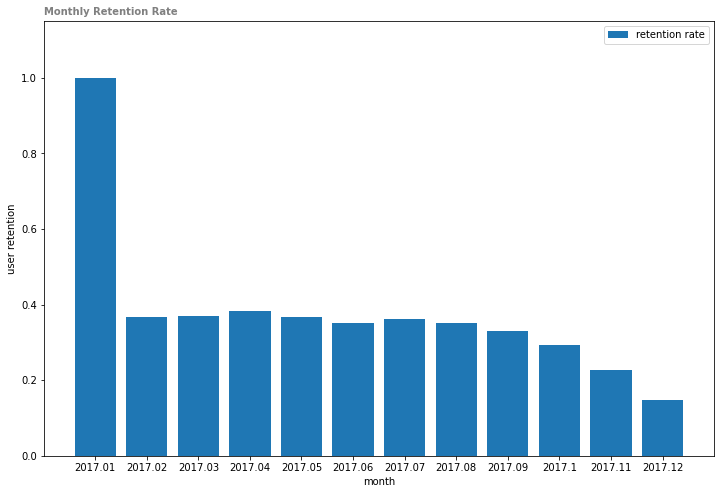

In [84]:
cohort_pivot = pd.pivot_table(df_transaction, index='first_cohort', columns='cohort_distance', values='customer_id', aggfunc=pd.Series.nunique)

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

bar = cohort_pivot.sum().divide(cohort_pivot.sum().array[0])

plt.figure(figsize=(12,8))
y_labels2 = [ str(int(header)/100) for header in headers]

plt.bar(y_labels2,bar, label='retention rate')
#plt.xticks(df_3month.Date[::5],  rotation='0')
plt.xlabel('month', fontsize= 10)
plt.ylabel('user retention', fontsize= 10)
plt.title('Monthly Retention Rate', fontweight ='bold', fontsize= 10, color="gray", loc='left')
plt.margins(y= 0.15)

plt.legend()
plt.show()


### ب

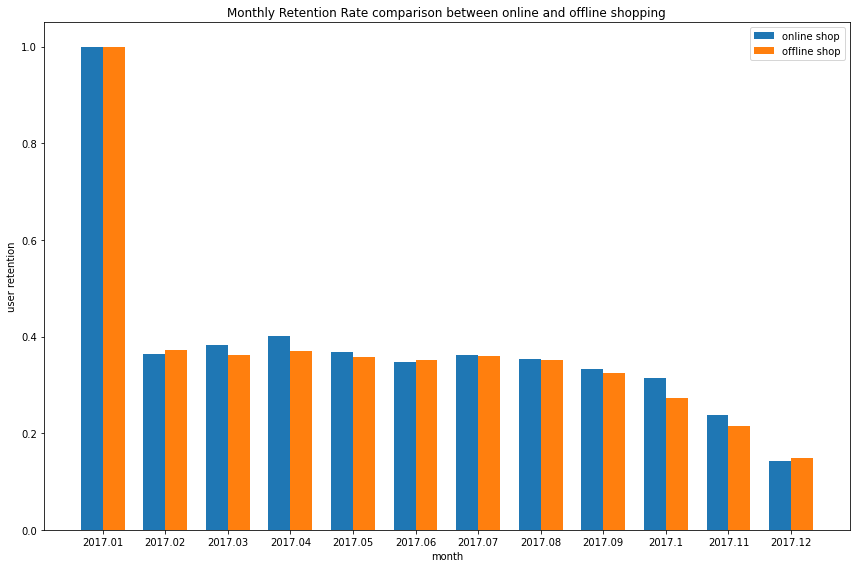

In [104]:
df_transaction2 = df_transaction[df_transaction['online_order'].notna()]
df_transaction_online = df_transaction2[df_transaction.online_order ==1.0]
df_transaction_offline = df_transaction2[df_transaction.online_order ==0]

cohort_pivot_online = pd.pivot_table(df_transaction_online, index='first_cohort', columns='cohort_distance', values='customer_id', aggfunc=pd.Series.nunique)
cohort_pivot_offline = pd.pivot_table(df_transaction_offline, index='first_cohort', columns='cohort_distance', values='customer_id', aggfunc=pd.Series.nunique)


cohort_size_online = cohort_pivot_online.iloc[:,0]
cohort_size_offline = cohort_pivot_offline.iloc[:,0]
retention_matrix_online = cohort_pivot_online.divide(cohort_size_online, axis = 0)
retention_matrix_offline = cohort_pivot_offline.divide(cohort_size_offline, axis = 0)


bar_on = cohort_pivot_online.sum().divide(cohort_pivot_online.sum().array[0])
bar_off = cohort_pivot_offline.sum().divide(cohort_pivot_offline.sum().array[0])

y_labels2 = [ str(int(header)/100) for header in headers]


x = np.arange(len(y_labels2))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, bar_on, width, label='online shop')
rects2 = ax.bar(x + width/2, bar_off, width, label='offline shop')

ax.set_ylabel('user retention')
ax.set_xlabel('month')
ax.set_title('Monthly Retention Rate comparison between online and offline shopping')
ax.set_xticks(x, y_labels2)
ax.legend()


fig.tight_layout()

plt.show()


<div dir = "rtl">
همانطور که در شکل بالا میتوان دید،در اکثر ماه ها تعداد کاربرانی که برمیگرند برای خرید انلاین بالاتر می باشد. 
</div>

### ج

In [ ]:
df_transaction2 = df_transaction[df_transaction['online_order'].notna()]
df_transaction3 = df_transaction2[df_transaction.online_order =='large']
df_transaction4 = df_transaction2[df_transaction.online_order =='maedium']
df_transaction5= df_transaction2[df_transaction.online_order =='small']

cohort_pivot1 = pd.pivot_table(df_transaction3, index='first_cohort', columns='cohort_distance', values='customer_id', aggfunc=pd.Series.nunique)
cohort_pivot2 = pd.pivot_table(df_transaction4, index='first_cohort', columns='cohort_distance', values='customer_id', aggfunc=pd.Series.nunique)
cohort_pivot3 = pd.pivot_table(df_transaction5, index='first_cohort', columns='cohort_distance', values='customer_id', aggfunc=pd.Series.nunique)


cohort_size_online = cohort_pivot_online.iloc[:,0]
cohort_size_offline = cohort_pivot_offline.iloc[:,0]
retention_matrix_online = cohort_pivot_online.divide(cohort_size_online, axis = 0)
retention_matrix_offline = cohort_pivot_offline.divide(cohort_size_offline, axis = 0)


bar_on = cohort_pivot_online.sum().divide(cohort_pivot_online.sum().array[0])
bar_off = cohort_pivot_offline.sum().divide(cohort_pivot_offline.sum().array[0])

y_labels2 = [ str(int(header)/100) for header in headers]


x = np.arange(len(y_labels2))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, bar_on, width, label='online shop')
rects2 = ax.bar(x + width/2, bar_off, width, label='offline shop')

ax.set_ylabel('user retention')
ax.set_xlabel('month')
ax.set_title('Monthly Retention Rate comparison between online and offline shopping')
ax.set_xticks(x, y_labels2)
ax.legend()


fig.tight_layout()

plt.show()


## 2

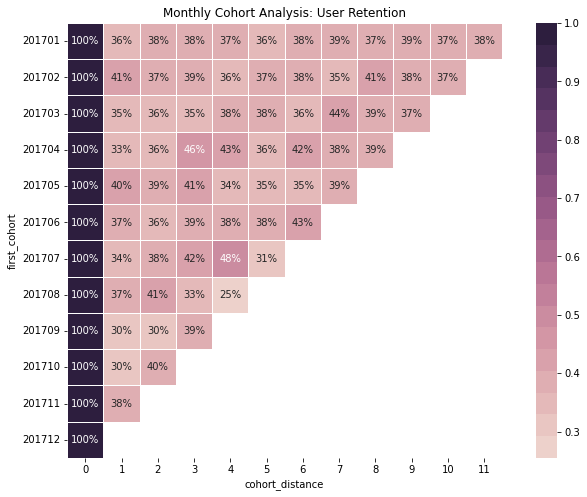

In [86]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks=ret_date, labels=y_labels)
plt.xticks(x_labels, x_labels)
ax.set(xlabel='Months After First Paid', ylabel='First Paid Cohort', title="Monthly Cohort Analysis: User Retention")
sns.heatmap(retention_matrix,  annot=True, fmt='.0%', mask=retention_matrix.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(20))
plt.show()

<div dir = "rtl">
تحلیل کوهورت را در شکل بالا می بینیم که ماه اول را با صفر نشان داده ایم و همانطو که میتوان از شکل دید در تمامی ماه ها تقریبا با یک نسبت بازگشت مشتری داریم. و ممکن است مشتری برود و پس از ۱۱ ماه برگردد .
</div>